<a href="https://colab.research.google.com/github/Ign4cho/ProyectoBI/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
csv_path = "/content/drive/MyDrive/Colab Notebooks/EXTRACCION_Prov-San-Juan_032024.csv"
cantidad_filas = 30000
column_types = {
            'CODIGOENTIDAD': 'float64',
            'IDLINEA': 'float64',
            'NROCHIP': 'float64',
            'NROTARJETA': 'float64',
            'CODIGOCONTRATO': 'float64',
            'SECUENCIA_TARJETA': 'float64',
            'FECHATRX': 'string',
            'MONTO': 'float64',
            'SALDO': 'float64',
            'VALOR_TARIFA': 'float64',
            'INTERNO': 'float64',
            'DISPOSITIVO': 'float64',
            'SECTERMINAL': 'float64',
            'CODIGOTIPOTRX': 'float64',
            'CODIGOSUBTIPOTRX': 'float64',
            'TIPOMAPPING': 'float64',
            'ENTIDAD_EMISORA_TARJ': 'float64',
            'CODIGOERROR': 'float64',
            'FECHAPROCESO': 'string',
            'RAMAL': 'float64',
            'IDARCHIVOINTERCAMBIO': 'float64',
            'CODIGOROL': 'string',
            'CODIGOTIPOTARJETA': 'float64',
            'SENTIDO': 'string',
            'MONEDERO_ID': 'float64',
            'EMISOR_CONTRATO': 'float64',
            'SAM_ID': 'string',
            'LG_ID': 'float64',
            'TIPO_TERMINAL': 'float64',
            'ID_SERVICIO': 'float64',
            'VERSION_TIPO_TRX': 'float64',
            'ID_INTEGRADOR': 'float64',
            'EMISOR_MONEDERO': 'float64',
            'SECCION_FIN': 'float64',
            'SECCION_INICIO': 'float64',
            'DESCUENTO': 'float64',
            'PROVISION': 'float64',
            'ID_POSICIONAMIENTO': 'float64',
            'PTC': 'float64',
            'LTC': 'float64'
        }

In [ ]:
def load_data():
    return pd.read_csv(csv_path, delimiter=';', on_bad_lines='skip', decimal=',',
                        nrows=cantidad_filas,
                          dtype=column_types)

In [ ]:
data=load_data()

In [ ]:
columnas_importantes = ['CODIGOENTIDAD', 'IDLINEA', 'NROTARJETA', 'CODIGOCONTRATO',
                            'FECHATRX','CODIGOTIPOTRX','RAMAL','ID_POSICIONAMIENTO','ID_COMBINACION']
df = data[columnas_importantes]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CODIGOENTIDAD       30000 non-null  float64
 1   IDLINEA             30000 non-null  float64
 2   NROTARJETA          30000 non-null  float64
 3   CODIGOCONTRATO      30000 non-null  float64
 4   FECHATRX            30000 non-null  string 
 5   CODIGOTIPOTRX       30000 non-null  float64
 6   RAMAL               30000 non-null  float64
 7   ID_POSICIONAMIENTO  30000 non-null  float64
 8   ID_COMBINACION      4357 non-null   float64
dtypes: float64(8), string(1)
memory usage: 2.1 MB


In [ ]:
df.describe()

,CODIGOENTIDAD,IDLINEA,NROTARJETA,CODIGOCONTRATO,CODIGOTIPOTRX,RAMAL,ID_POSICIONAMIENTO,ID_COMBINACION
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,4357.000000
mean,309.107300,3390.538833,1.831136e+09,613.728133,13.451867,7553.857067,75.850633,1.045444
std,110.969705,36.521350,2.156192e+07,9.235998,3.523743,36.807078,63.272025,0.227274
min,250.000000,3120.000000,1.100003e+09,602.000000,10.000000,7490.000000,2.000000,1.000000
25%,250.000000,3367.000000,1.816714e+09,602.000000,12.000000,7521.000000,33.000000,1.000000
50%,254.000000,3387.000000,1.836415e+09,621.000000,12.000000,7547.000000,68.000000,1.000000
75%,256.000000,3415.000000,1.846338e+09,621.000000,12.000000,7583.000000,105.000000,1.000000
max,525.000000,3510.000000,1.854495e+09,624.000000,22.000000,7629.000000,536.000000,3.000000


# Comentarios

## Describe e Info
La mayoría de los valores no son necesariamente numéricos, pero vemos que la mayoría son non-null por lo menos.

In [ ]:
data.head()

,CODIGOENTIDAD,IDLINEA,NROCHIP,NROTARJETA,CODIGOCONTRATO,SECUENCIA_TARJETA,FECHATRX,MONTO,SALDO,VALOR_TARIFA,...,EMISOR_MONEDERO,SECCION_FIN,SECCION_INICIO,DESCUENTO,PROVISION,ID_POSICIONAMIENTO,PTC,LTC,ID_COMBINACION,DESCUENTO_ITG
0,250.0,3372.0,4.055532e+16,1.851788e+09,602.0,129.0,25/03/2024 12:04:48,155.0,122.50,155.00,...,5.0,5.0,1.0,0.00,0.0,111.0,128.0,2.0,NaN,NaN
1,250.0,3372.0,1.580374e+09,1.823989e+09,621.0,1185.0,25/03/2024 12:03:41,211.5,1687.95,211.50,...,5.0,2.0,1.0,0.00,0.0,111.0,1162.0,36.0,NaN,NaN
2,250.0,3372.0,3.613713e+16,1.845179e+09,602.0,174.0,25/03/2024 12:02:15,0.0,1453.88,470.01,...,5.0,2.0,1.0,470.01,0.0,111.0,164.0,8.0,2.0,470.01
3,250.0,3372.0,1.220945e+09,1.816274e+09,621.0,4817.0,25/03/2024 12:00:26,211.5,53.66,211.50,...,5.0,2.0,1.0,0.00,0.0,110.0,4775.0,116.0,NaN,NaN
4,250.0,3372.0,1.682160e+09,1.825395e+09,621.0,2645.0,25/03/2024 08:09:33,211.5,318.89,211.50,...,5.0,2.0,2.0,0.00,0.0,39.0,2620.0,132.0,NaN,NaN


# Empezamos con Matplotlib
Vamos a probar algunas visualizaciones
Primero vamos a ver de Codigotipotrx que es el codigo tipo transacción. Según el excel tiene dos valores posibles: 12 y 22.
Después anazlizamos también el ID_COMBINACIÓN

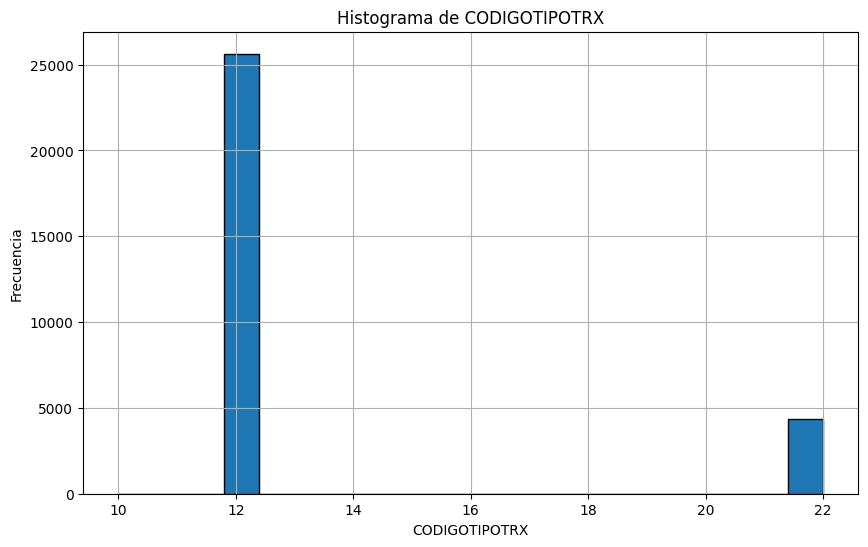

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(data['CODIGOTIPOTRX'], bins=20, edgecolor='black')
plt.title('Histograma de CODIGOTIPOTRX')
plt.xlabel('CODIGOTIPOTRX')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


No coincide con lo que nos dice en el excel
Vamos a estudiarlo con una tabla de frecuencia

In [ ]:
data.value_counts('CODIGOTIPOTRX')


,count
CODIGOTIPOTRX,
12.0,25636
22.0,4357
10.0,7


## TODO

Después vamos a revisar si esto sigue pasando con otros meses.

In [ ]:
data.value_counts('ID_COMBINACION')

,count
ID_COMBINACION,
1.0,4177
2.0,162
3.0,18


tampoco coincide con las tablas

# Tabla GPS

In [ ]:

path_gps = "/content/drive/MyDrive/Colab Notebooks/GPS_SAN_JUAN_032023.csv"
filas_gps = 800

columna_gps = [
        'CODIGOENTIDAD', 'IDLINEA', 'DATE_TIME', 'LONGITUDE', 'LATITUDE', 'VELOCITY'
    ]
tipo_gps = {
    "CODIGOENTIDAD": "int64",
    "IDLINEA": "int64",
    "INTERTNO": "float64",
    "C_LD_ID (RAMAL)": "int64",
    "FILE_ID": "float64",
    "DTSN": "float64",
    "DATE_TIME": "datetime64[ns]",
    "TYPE": "int64",
    "DIRECTION": "int64",
    "LONGITUDE": "float64",
    "LATITUDE": "float64",
    "VELOCITY": "float64",
    "DISTANCE": "float64",
    "STATUS": "int64",
    "CONTROL_POINT": "int64"
}



In [ ]:
def load_data_GPS():
    return pd.read_csv(
        path_gps,
        dtype=tipo_gps,
        delimiter=';',
        on_bad_lines='skip',
        decimal=',',
        nrows=filas_gps)


In [ ]:
df_gps = load_data_GPS()

In [ ]:
df_gps.head()

,codigoentidad,idlinea,interno,c_ld_Id,file_id,FILENAME,record_type,dtsn,date_time,TYPE,direction,device,longitude,latitude,velocity,distance,status,c_control_point
0,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078726,06/03/2023 08:44:04,3,0,4151,-69.23099,-30.28858,0,90786,8,37
1,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078717,06/03/2023 08:40:04,3,0,4151,-69.22225,-30.30829,0,88050,8,36
2,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078696,06/03/2023 08:36:03,3,0,4151,-69.21514,-30.31642,42,86533,8,35
3,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078671,06/03/2023 08:32:02,3,0,4151,-69.20416,-30.32098,0,85006,8,34
4,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078668,06/03/2023 08:28:02,3,0,4151,-69.20639,-30.353,65,81253,8,33


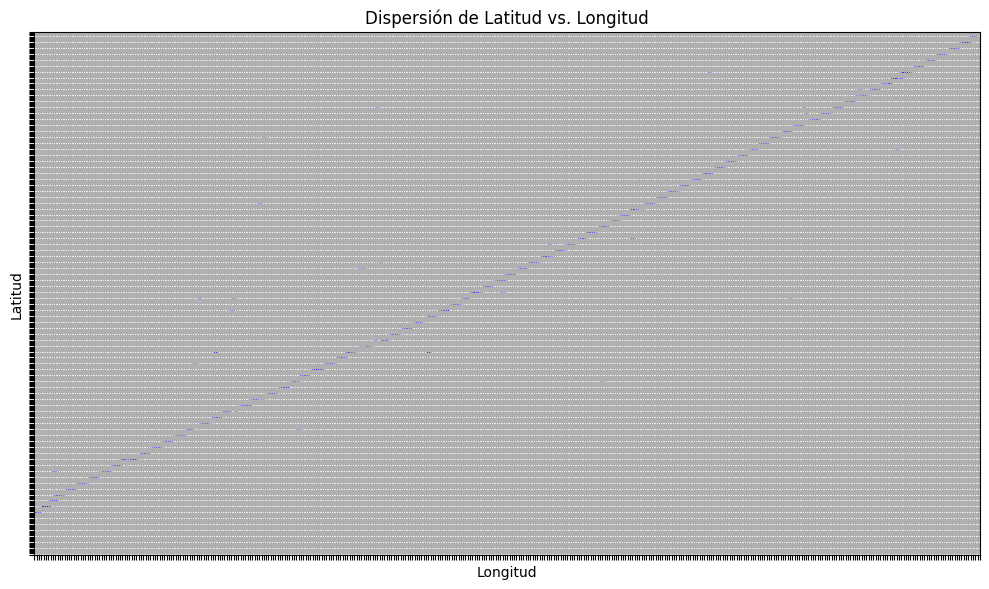

In [ ]:
lat_min, lat_max = df_gps['latitude'].min(), df_gps['latitude'].max()
lon_min, lon_max = df_gps['longitude'].min(), df_gps['longitude'].max()


plt.figure(figsize=(10,6))
plt.scatter(df_gps['longitude'], df_gps['latitude'], c='blue', marker='o', alpha=0.3, s=10)
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)
plt.title('Dispersión de Latitud vs. Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.grid(True)
plt.show()
